In [60]:
import pandas as pd
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
data=pd.read_csv("50_Startups.csv")
data.head()

,RND_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
data.corr()

,R&D_Spend,Administration,Marketing_Spend,Profit
R&D_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


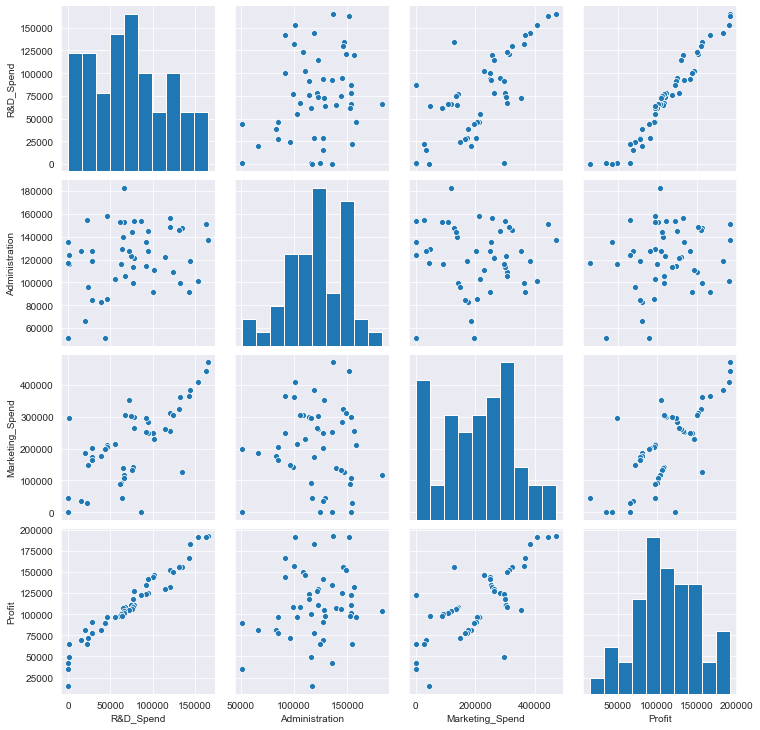

In [13]:
import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(data)

In [17]:
import statsmodels.formula.api as smf

In [20]:
model1=smf.ols('Profit~Administration + RND_Spend + Marketing_Spend',data=data).fit()

In [21]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           4.53e-30
Time:                        12:16:12   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
RND_Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
 # Simple linear reg model for Administration and Marketing_spend as P value is high

In [23]:
model_admin=smf.ols('Profit~Administration',data=data).fit()
model_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 25 Nov 2020   Prob (F-statistic):              0.162
Time:                        12:20:32   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
model_marketvalue=smf.ols('Profit~Marketing_Spend',data=data).fit()
model_marketvalue.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           4.38e-10
Time:                        12:22:52   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#model with mkt and admin

model_marketnadmin=smf.ols('Profit~Administration+Marketing_Spend',data=data).fit()
model_marketnadmin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           2.50e-10
Time:                        12:27:46   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration      0.3237      0.131      2.468      0.017       0.060       0.588
Marketing_Spend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# will calculate VIF (Varience inflation fector) value 

In [26]:
rsq_RND=smf.ols('RND_Spend~Administration + Marketing_Spend',data=data).fit().rsquared
vif_RND=1/(1-rsq_RND)

In [32]:
rsq_RND,
vif_RND
print(rsq_RND,'\n',vif_RND)

0.9507459940683246 
 20.30291711474573


In [34]:
rsq_Mkt=smf.ols('Marketing_Spend~ RND_Spend+Administration',data=data).fit().rsquared
vif_Mkt=1/(1-rsq_Mkt)

In [35]:
rsq_Admin=smf.ols('Administration~Marketing_Spend+RND_Spend',data=data).fit().rsquared
vif_Admin=1/(1-rsq_Admin)

In [37]:
d1={'Variables':['RND','Marketing_Spend','Administration'],'VIF':[vif_RND,vif_Mkt,vif_Admin]}
d2={'Variables':['RND','Marketing_Spend','Administration'],'Rsq':[rsq_RND,rsq_Mkt,rsq_Admin]}

In [40]:
pd.DataFrame(d1)

,Variables,VIF
0,RND,20.302917
1,Marketing_Spend,2.326773
2,Administration,1.175091


In [41]:
pd.DataFrame(d2)

,Variables,Rsq
0,RND,0.950746
1,Marketing_Spend,0.570220
2,Administration,0.149002


In [42]:
# Residual analysis - Q-Q plot
res=model1.resid
res

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

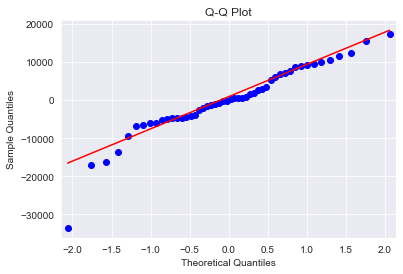

In [46]:
import statsmodels.api as sm
qqplot=sm.qqplot(res, line='q')
plt.title("Q-Q Plot")
plt.show;

In [64]:
list(np.where(model1.resid<-20000)) # here o/p is index 49 as unusal input

[array([49], dtype=int64)]

In [ ]:
# REsidual plot for homoscadacity

In [51]:
def get_standardized_values (vals):
    return (vals-vals.mean())/vals.std()

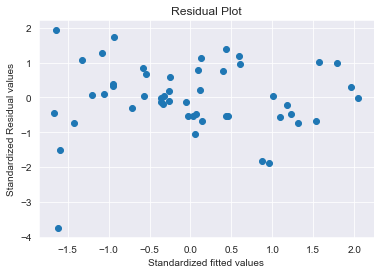

In [54]:
plt.scatter(get_standardized_values(model1.fittedvalues),
           get_standardized_values(model1.resid))
plt.title("Residual Plot")
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized Residual values')
plt.show()

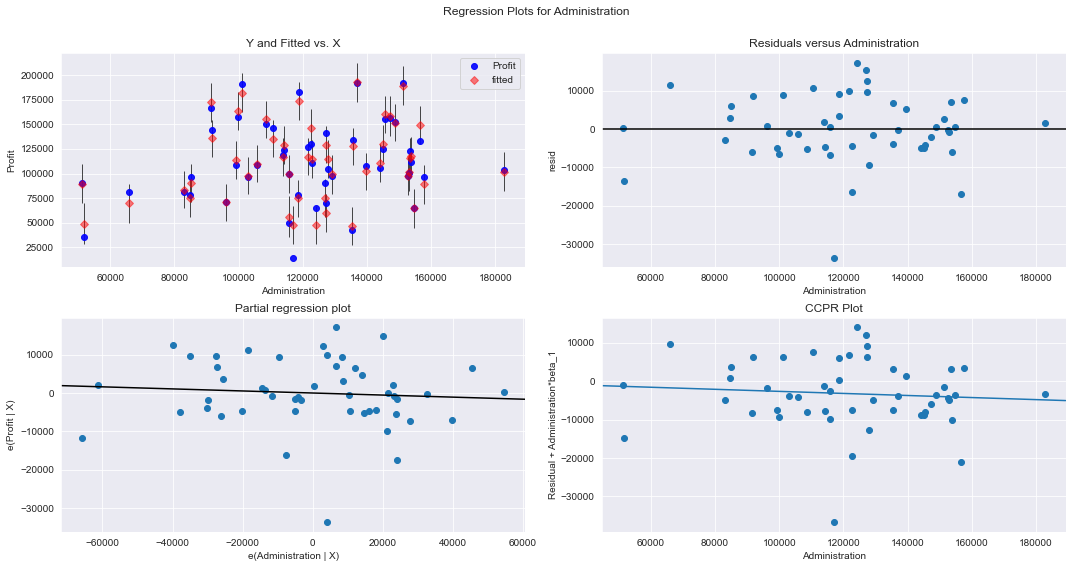

In [58]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"Administration",fig=fig)
plt.show()

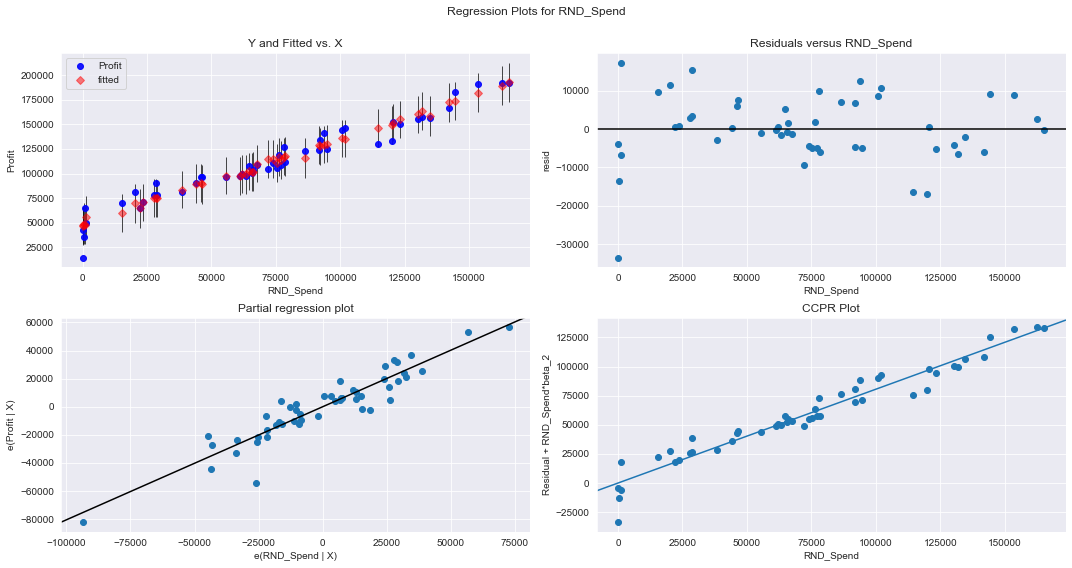

In [61]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"RND_Spend",fig=fig)
plt.show()

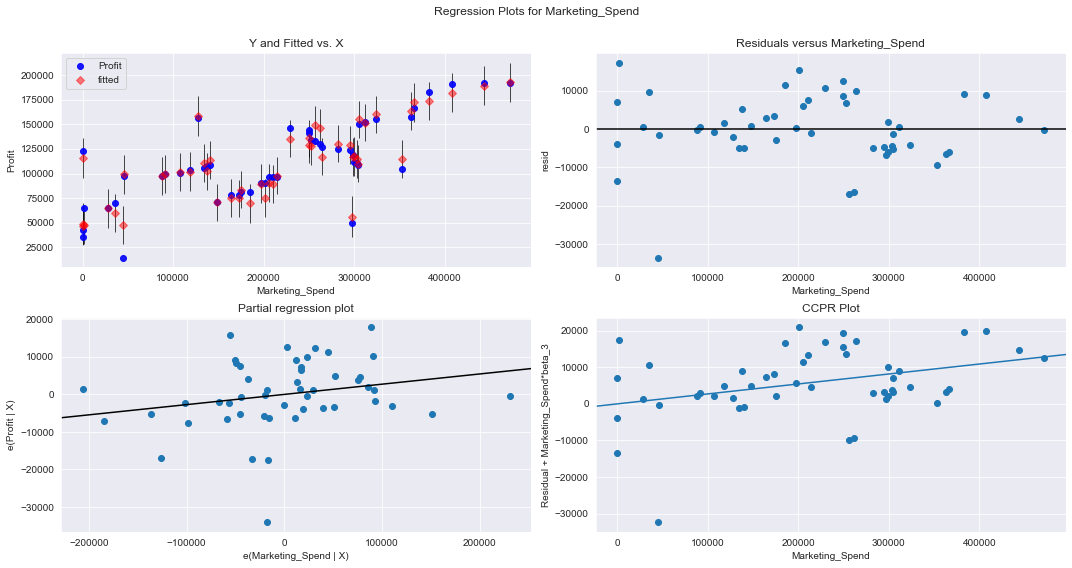

In [62]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"Marketing_Spend",fig=fig)
plt.show()

In [65]:
#model deletion diagnostics , Cook's distance 
model_influence=model1.get_influence()
(c, _) = model_influence.cooks_distance

In [66]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

<ipython-input-73-ba2eb549921f>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data)),np.round(c,3))


Text(0, 0.5, 'Cook distance')

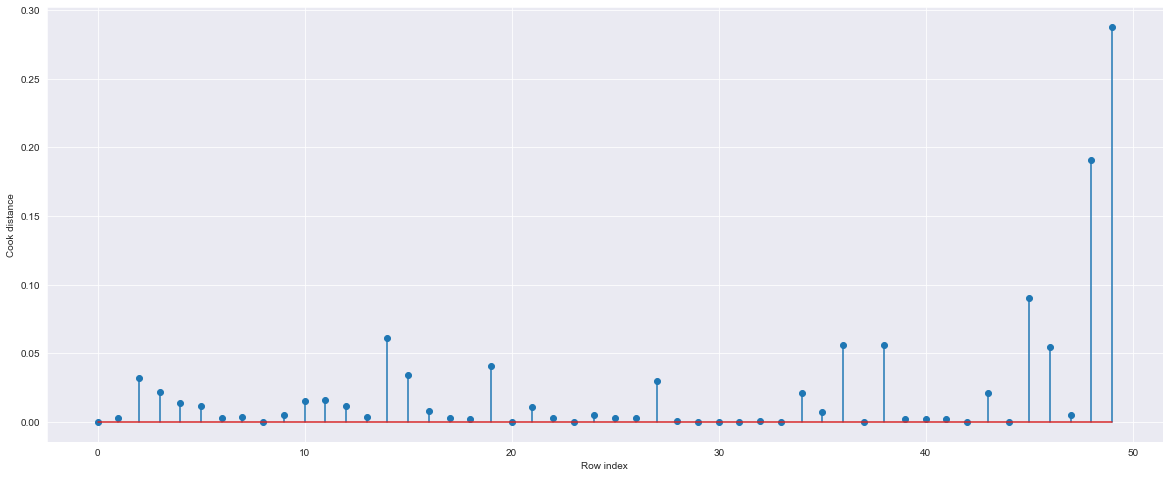

In [73]:
fig=plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cook distance')

In [75]:
# index and value of influencer where c is more than .5, argument maximum from cook's distance value
np.argmax(c),np.max(c) # o/p means 49th record is influencing our model

(49, 0.2880822927543255)

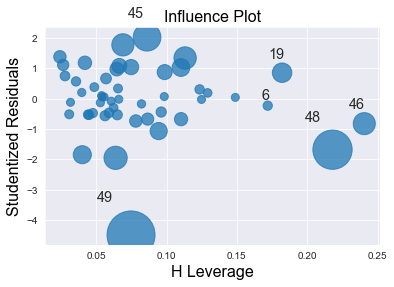

In [76]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [85]:
k=data.shape[1]
n=data.shape[0]
leverage_cutoff=3*((k+1)/n)

In [86]:
leverage_cutoff

0.36

In [95]:
data[data.index.isin([49])]

,RND_Spend,Administration,Marketing_Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [161]:
data.head()

,RND_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [162]:
data1=data.drop(data.index[[49]],axis=0).reset_index()

In [165]:
data1

,index,RND_Spend,Administration,Marketing_Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [167]:
data1=data1.drop(['index'],axis=1)

In [168]:
data1

,RND_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


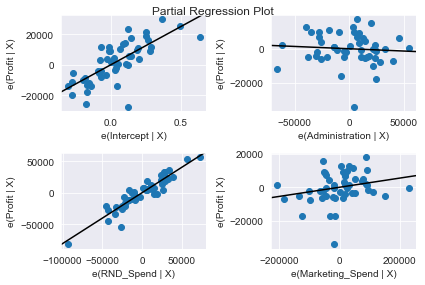

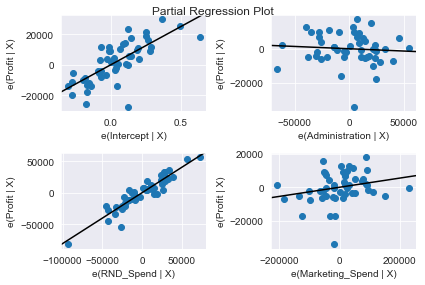

In [169]:
sm.graphics.plot_partregress_grid(model1)

In [ ]:
#building final model will elemenate Administration for model building and use new data1

In [170]:
final_model=smf.ols('Profit~RND_Spend + Marketing_Spend',data=data1).fit()

In [171]:
(final_model.rsquared,final_model.aic)

(0.9610856807456628, 1018.8564801588338)

In [173]:
final_model1=smf.ols('Profit~RND_Spend + Administration +Marketing_Spend',data=data1).fit()

In [174]:
(final_model1.rsquared,final_model1.aic)

(0.9613162435129847, 1020.5652974526367)

In [ ]:
# aic value is less for final_model and rsqueared value also imporved so will take this model and one more time check for 
#cook's distance

In [160]:
model_influence_final=final_model.get_influence()
(c_final, _)=model_influence_final.cooks_distance

<ipython-input-110-2b1cc5eaf253>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data1)),np.round(c_final,3))


<function matplotlib.pyplot.show(*args, **kw)>

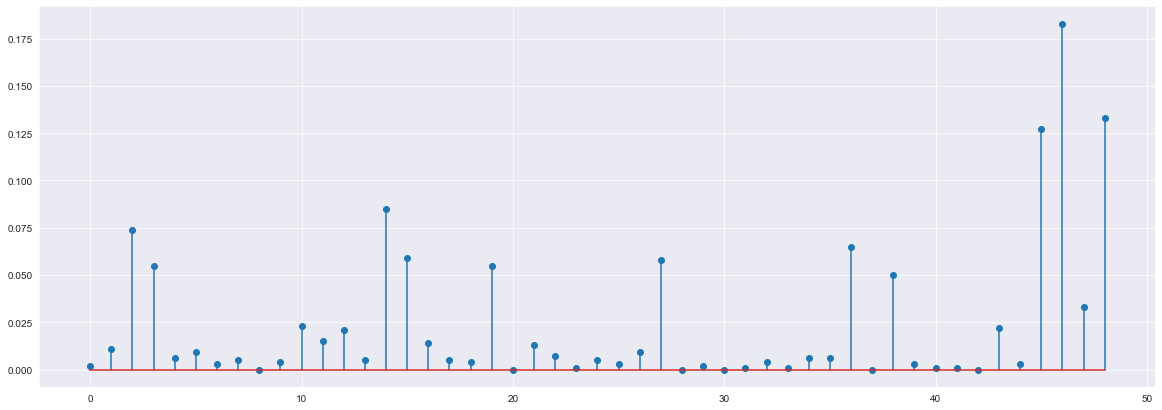

In [110]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c_final,3))
plt.show

In [112]:
np.argmax(c_final), np.max(c_final)

(46, 0.1833755649133863)

In [113]:
data2=data1.drop(data1.index[[45,46,48]],axis=0).reset_index()

In [114]:
data2

,index,RND_Spend,Administration,Marketing_Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [115]:
data2=data2.drop(['index'],axis=1)

In [116]:
data2

,RND_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [131]:
final_model2=smf.ols('Profit~Marketing_Spend + RND_Spend ',data=data2).fit()

In [132]:
model_influence_profit=final_model2.get_influence()
(cook_final1, _)= model_influence_profit.cooks_distance

<ipython-input-133-d078c22aca94>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data2)),np.round(cook_final1,3))


<StemContainer object of 3 artists>

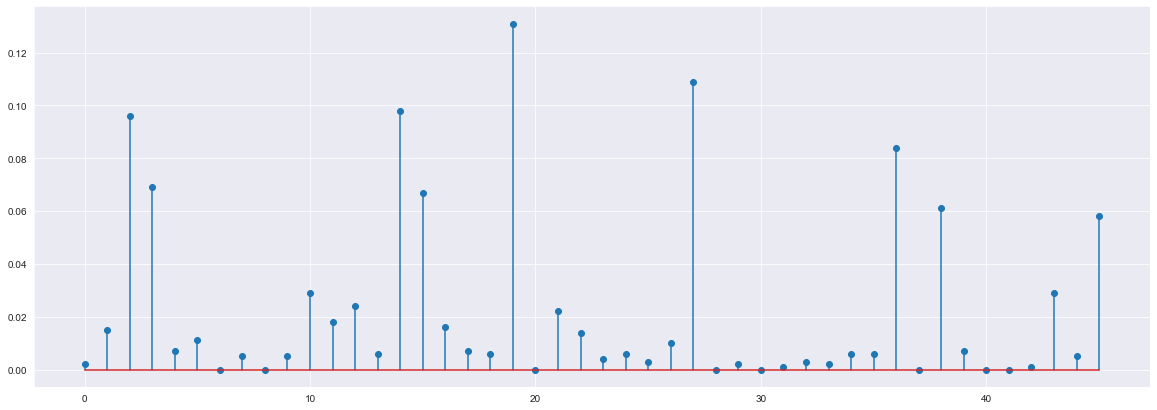

In [133]:
figure=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(cook_final1,3))

In [121]:
np.argmax(cook_final1), np.max(cook_final1)

(19, 0.1311526446834579)

In [134]:
(final_model2.rsquared,final_model2.aic)

(0.9611920624974509, 949.7556721616613)

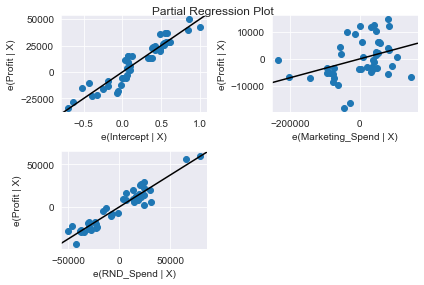

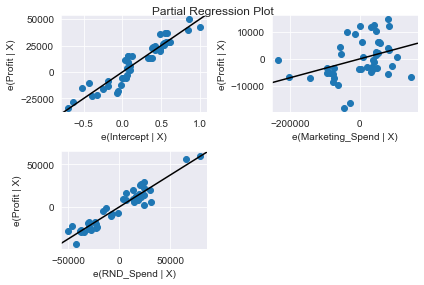

In [124]:
sm.graphics.plot_partregress_grid(final_model1)

In [150]:
final_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     532.5
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           4.59e-31
Time:                        19:15:41   Log-Likelihood:                -471.88
No. Observations:                  46   AIC:                             949.8
Df Residuals:                      43   BIC:                             955.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.029e+04   2424.629     20.743      0.000    4.54e+04    5.52e+04
Marketing_Spend     0.0350      0.013      2.627      0.012       0.008       0.062
RND_Spend           0.7507      0.037     20.511      0.000       0.677       0.825
==============================================================================
Omnibus:                        0.061   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.970   Jarque-Bera (JB):                0.161
Skew:                          -0.079   Prob(JB):                        0.923
Kurtosis:                       2.758   Cond. No.                     6.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
a={'Varibable':['R squared1' , 'R squared2' , 'R squared3'],'Rsquared' :np.round([model1.rsquared, final_model1.rsquared, final_model2.rsquared],3) }

In [136]:
a

{'Varibable': ['R squared1', 'R squared2', 'R squared3'],
 'Rsquared': array([0.951, 0.961, 0.961])}

In [138]:
pd.DataFrame(a)

,Varibable,Rsquared
0,R squared1,0.951
1,R squared2,0.961
2,R squared3,0.961


In [175]:
b={'Variable':['Model 1 - Vif', 'Model 2 - Vif', 'Model 3 - vif'], 'AIC': np.round([model1.aic, final_model1.aic, final_model2.aic],3)}

In [176]:
b

{'Variable': ['Model 1 - Vif', 'Model 2 - Vif', 'Model 3 - vif'],
 'AIC': array([1058.771, 1020.565,  949.756])}

In [177]:
pd.DataFrame(b)

,Variable,AIC
0,Model 1 - Vif,1058.771
1,Model 2 - Vif,1020.565
2,Model 3 - vif,949.756


In [183]:
pred_y=final_model1.predict(data2)

In [184]:
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     49375.776655
dtype: float64